# Project: IMDB Movie Rating

# Xu, Saibang 20655801

## Introduction

Sentiment analysis is the process of determining the emotional tone behind a series of words, used to gain an understanding of the opinions expressed by people.Sentiment analysis is extremely useful in social media as it helps to gain an overview of the public opinion behind certain topics. Machine learning algorithms are commonly used for sentiment analysis. In this project, we will analyze the IMDB dataset using different machine learning models to predict the customer's opinion on the movie based on his reviews. Apart from predictive models, one key step in the process of nature language processing is word vectorization. Three diffferent ways of word vectorization are implemented in the project, TF-IDF, Word2Vec and Doc2Vec. We will identify the best combination of machine learning algorithms and word vectorization that is specific to this task.


### Read TXT File

In [1]:
import pandas as pd  
import numpy as np
import os

In [2]:
pos_train=os.listdir('C:/Users/stark/Desktop/FinTech/Statistical Machine Learning/Project/aclImdb_v1 3/aclImdb/train/pos')
pos_review_train=[]
for i in pos_train:
    
    file=open('C:/Users/stark/Desktop/FinTech/Statistical Machine Learning/Project/aclImdb_v1 3/aclImdb/train/pos/'+i,'r',encoding='UTF-8')
    line=file.read()
    pos_review_train.append(line)
    

In [3]:
neg_train=os.listdir('C:/Users/stark/Desktop/FinTech/Statistical Machine Learning/Project/aclImdb_v1 3/aclImdb/train/neg')
neg_review_train=[]
for i in neg_train:
    
    file=open('C:/Users/stark/Desktop/FinTech/Statistical Machine Learning/Project/aclImdb_v1 3/aclImdb/train/neg/'+i,'r',encoding='UTF-8')
    line=file.read()
    neg_review_train.append(line)
    

In [4]:
pos_test=os.listdir('C:/Users/stark/Desktop/FinTech/Statistical Machine Learning/Project/aclImdb_v1 3/aclImdb/test/pos')
pos_review_test=[]
for i in pos_test:
    
    file=open('C:/Users/stark/Desktop/FinTech/Statistical Machine Learning/Project/aclImdb_v1 3/aclImdb/test/pos/'+i,'r',encoding='UTF-8')
    line=file.read()
    pos_review_test.append(line)

In [5]:
neg_test=os.listdir('C:/Users/stark/Desktop/FinTech/Statistical Machine Learning/Project/aclImdb_v1 3/aclImdb/test/neg')
neg_review_test=[]
for i in neg_test:
    
    file=open('C:/Users/stark/Desktop/FinTech/Statistical Machine Learning/Project/aclImdb_v1 3/aclImdb/test/neg/'+i,'r',encoding='UTF-8')
    line=file.read()
    neg_review_test.append(line)

In [6]:
df_train_pos=pd.DataFrame({'Review':pos_review_train,'Sentiment':1})
df_train_neg=pd.DataFrame({'Review':neg_review_train,'Sentiment':0})

In [7]:
df_test_pos=pd.DataFrame({'Review':pos_review_test,'Sentiment':1})
df_test_neg=pd.DataFrame({'Review':neg_review_test,'Sentiment':0})

In [8]:
df_pos=pd.concat([df_train_pos,df_test_pos],axis=0)
df_neg=pd.concat([df_train_neg,df_test_neg],axis=0)

In [9]:
df=pd.concat([df_pos,df_neg],axis=0,copy=False)

## Data Preprocessing

In [10]:
df.head()

,Review,Sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [11]:
import re
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from contractions import contractions_dict
from bs4 import BeautifulSoup

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\stark\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\stark\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stark\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\stark\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
# remove url links
url_pattern=r'https?://[^ ]+'
www_pattern = r'www.[^ ]+'

# remove hashtags
hash_tag_pattern="[^a-zA-Z]"

# remove @ mentions
user_pattern=r'@[A-Za-z0-9_]+'

# remove numbers
num_pattern='[0-9]'

#remove punctuations & double space
punctuation_pattern=r'[^\w\s]'
double_space_pattern='\s+'

# remove commonly used words
stop_words = stopwords.words('english') 

In [13]:
def lemmatize_word(sentence):
    
    lemmatizer = WordNetLemmatizer()
    new_sentence=[]
    for word,tag in pos_tag(sentence):
        
        if tag.startswith('N'):
            new_sentence.append(lemmatizer.lemmatize(word, pos=wordnet.NOUN))
        
        elif tag.startswith('V'):
            new_sentence.append(lemmatizer.lemmatize(word, pos=wordnet.VERB))
            
        elif tag.startswith('J'):
            new_sentence.append(lemmatizer.lemmatize(word, pos=wordnet.ADJ))
            
        elif tag.startswith('R'):
            new_sentence.append(lemmatizer.lemmatize(word, pos=wordnet.ADV))
            
        else:
            new_sentence.append(lemmatizer.lemmatize(word, pos=wordnet.NOUN))
            
    return (' '.join(new_sentence))


In [14]:
def words_clean(sentence):
    
    sentence=sentence.lower()
    
    # html decoding
    sentence=BeautifulSoup(sentence, 'lxml')
    sentence=sentence.get_text()
    
    # remove @ mentions
    sentence=re.sub(user_pattern, '', sentence)
    
    # remove url links
    sentence=re.sub(url_pattern, '', sentence)
    sentence=re.sub(www_pattern, '', sentence)
    
    # remove hash tags
    sentence=sentence.replace('#',' ')
    
    # remove numbers
    sentence=re.sub(num_pattern, ' ', sentence)
    
    # contractions
    for word in sentence.split():
        if word in contractions_dict:
            sentence=sentence.replace(word, contractions_dict[word])
    
    # remove punctuations & double subspace
    sentence=re.sub(punctuation_pattern, ' ', sentence)
    sentence=re.sub(double_space_pattern, ' ', sentence)
    
    # remove underscore
    sentence=word_tokenize(sentence)
    sentence=[word.replace('_',' ') for word in sentence]
    
    # remove stopwords
    sentence=[word for word in sentence if word not in stop_words]
    
    # word lemmatization
    sentence=lemmatize_word(sentence)
    
    return (sentence)
    
    

In [15]:
example="<head> The movie is so bad. They're trying 100 to make it worst! They failed @DC fans#Justice_League <\b> https://www.rottentomatoes.com"

In [16]:
example

"<head> The movie is so bad. They're trying 100 to make it worst! They failed @DC fans#Justice_League <\x08> https://www.rottentomatoes.com"

It is essential to preprocess the data as the original data is usually chaotic and contains too much irrelevant information. The preprocessing of the data involves two steps: 1) Remove special characters 2) Word contraction and lemmatization

As shown in the example above, it is pretty clear that the review is criticizing the movie for not meeting the expectation of fans. It is obvious that words like 'bad','fail' and 'worst' are the key indicators of the audience's attitude to the movie. However, the original sentence contains too much irrelevant information such as numbers, website link, special characters and punctuations. Therfore, data preprocessing in the context of nature language processing is essentially extracting the key words from a sequence of special characters and words. Regular expression built in Python is used to remove those useless information. For example, to delete the website link from the review above, we first find the sequence of characters that match the url pattern defined as r'www.[^ ]+' and then substitute it with empty string.

The second step are word contraction and lemmatization. A contraction is a shortened form of a word. For example, 'They're' is a contraction form of the words 'They are'. We use Contraction Dictionary from the package Contractions to revert back the word that is in the shortened form.<br>Lemmatization in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item. For instance, 'bad' and 'worst' are essentially the same word but in different forms. Characterizing them into two different words could cause distortion to the sentiment analysis and increase the complexity. Therefore, with the help of WordNet(a lexical database), we transfer the word back to its lemma based on its corresponding tag. Another thing that is worth to mention here is the removal of commonly used words. For example, words like 'is', 'are' and 'it' basically appear in every review but they don't carry any emotion. These stop words need to be removed.

After performing the data preprocessing on the example above, the output is shown below. We successfully remove the special characters and stop words in the example and transfer 'worst' to 'bad', 'fans' to 'fan' and 'trying' to 'try'.

In [17]:
words_clean(example)

'movie bad try make bad fail fan justice league'

In [18]:
data=df.copy()

In [19]:
for i in range(len(data)):
    
    sentence=data.iloc[i,0]
    data.iloc[i,0]=words_clean(sentence)


In [20]:
data.head()

,Review,Sentiment
0,bromwell high cartoon comedy run time program ...,1
1,homelessness houselessness george carlin state...,1
2,brilliant act lesley ann warren best dramatic ...,1
3,easily underrated film inn brook cannon sure f...,1
4,typical mel brook film much less slapstick mov...,1


In [21]:
data.to_csv('Project',index=False)

In [22]:
df.to_csv('Origninal',index=False)

# Train test split

In [23]:
from sklearn.model_selection import train_test_split

X=data.drop('Sentiment', axis = 1)
y=data['Sentiment']
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 25, shuffle = True, stratify = y)


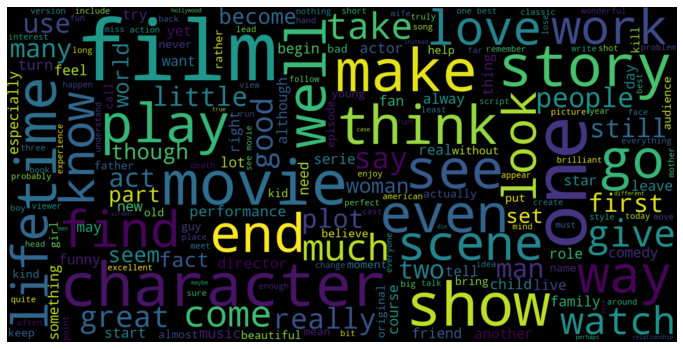

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
pos=x_train[y_train==1]
pos_string=[]
for t in pos.Review:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

The word cloud represents word usage in a document by resizing individual words proportionally to its frequency, and then presenting them in random arrangement. The graph above is the word cloud plot for the postitive reviews. Many of the words with relatively big size can be interpreted quite neutral, such as 'film', 'character', etc. Some of the words in smaller size show strong positive emotions, such as 'funny', 'beautiful', 'best', etc. Therefore, the frequency of the word is not a good indicator of the prediction power. We propose three approaches to convert textual data into a numeric form -----  TF-IDF, Word2Vec and Doc2Vec.

## TF--IDF

 TF--IDF stands for Term Frequency-Inverse Document Frequency. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance of the word increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. The term frequency is the relative term frequency defined as below:

$$TF(t,d) = \frac{number\: o\!f \: times \: term(t) \: appears \: in \: document(d)}{total \: number \: o\!f \: terms \: in \: document(d)}$$

Inverse Document Frequency, which measures how important a word is to differentiate each document, is defined as below:

$$IDF(t,d)=log(\frac{total\;number\;o\!f \;documents(d)}{number\;o\!f \;documents(d)\;with\;the\;term(t)\;in\;it})$$

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
word_frequency=vectorizer.fit_transform(x_train['Review'])

In [27]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logit=LogisticRegression(solver='newton-cg')
rf=RandomForestClassifier(n_estimators=200)
gb=xgb.XGBClassifier()

In [28]:
performance=pd.DataFrame({'No. of Features=100':np.zeros(3),
                   'No. of Features=500':np.zeros(3),
                  'No. of Features=1000':np.zeros(3),
                   'No. of Features=2000':np.zeros(3)})

In [29]:
classifier=[logit,rf,gb]
num=[100,500,1000,2000]
for index,clf in enumerate(classifier):
    for i,k in enumerate(num):
        vectorizer = TfidfVectorizer(max_features=k)
        word_frequency=vectorizer.fit_transform(x_train['Review'])
        score=np.mean(cross_val_score(clf,word_frequency,y_train,scoring='accuracy',cv=5))
        performance.iloc[index,i]=score
        
        

In [30]:
performance.rename(index={0:'Logistic Regression',1:'Random Forest',2:'XG Boosting'}, inplace=True)
performance

,No. of Features=100,No. of Features=500,No. of Features=1000,No. of Features=2000
Logistic Regression,0.752900,0.842350,0.864750,0.876675
Random Forest,0.745275,0.819525,0.835225,0.843475
XG Boosting,0.739300,0.796925,0.804650,0.806750


Since the class is balanced in the data, we use accuracy score to evaluate the performance of the model. To better approximate the generalization error, 5-fold cross-validation is used. As shown in the table above, the logistic regression gives the highest accuracy of 0.876 given 2000 features. The logistic regression outperforms the random forest and gradient boosting regardless of the number of features. Although feature number of 2000 gives the best performance in all 3 cases, we would only use top 1000 features for the sake of simplicity. An increase of 1000 in feature number only boost the accuracy by 1.2%.

In [31]:
vectorizer=TfidfVectorizer(max_features=1000)
word_frequency=vectorizer.fit_transform(x_train['Review'])
word_frequency_test=vectorizer.transform(x_test['Review'])

In [32]:
from sklearn.metrics import classification_report
logit.fit(word_frequency,y_train)
prediction=logit.predict(word_frequency_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5000
           1       0.86      0.87      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



The test accuracy of the logistic regression is 86% which is slightly below the train accuracy(86.5%). The logistic regression well captures the pattern in the data.

# Word2vec

One major drawback of TF-IDF is that it ignores the context of words. Specifically speaking, it can not identify the ordering of words or identify the group of words that have similar meanings. Word2vec converts textual data into a numeric form in a way that takes the context of words into consideration. Word2vec representation is created using 2 algorithms: Continuous Bag-of-Words model (CBOW) and the Skip-Gram model.CBOW creates a rolling window where it predicts the current word using the surrounding words. Skip-Gram model, which is the opposite of CBOW, predicts the surrounding words using the current word. After training, each word represented by a word vector, will be projected into a new feature space. The similarity between words can be easily approxiamted by the cosine similarity of the word vectors. Besides, compared to TF-IDF, this technique significantly reduces the computational cost by restraining the feature space from thousands of dimensions to 100 dimensions in this case.

In [33]:
from gensim.models import Word2Vec

In [34]:
words=[]
for i in range(len(data)):
    
    word=word_tokenize(data.iloc[i,0])
    words.append(word)

In [35]:
model=Word2Vec(words, size=100, window=5, min_count=1, workers=4)

Since Word2vec is an unsupervised learning technique, the whole dataset is used to train the model. To represent the paragraph vector, we take the average of all the word vectors contained in the paragraph. This average vector will represent the paragraph vector. Then train-test-split is performed on these paragraph vectors for model training and evaluation.

In [36]:
feature_space=np.zeros((50000, 100))
all_words=model.wv.index2word

for i in range(len(data)):
    
    feature_vector=np.zeros(100)
    words=word_tokenize(data.iloc[i,0])
    for word in words:
        if word in all_words:
            feature_vector=feature_vector+model.wv.__getitem__(word)
    feature_vector=feature_vector/len(words)
    feature_space[i]=feature_vector
            
    

In [37]:
x_wv=feature_space
y_wv=data['Sentiment']

In [38]:
performance_wv=pd.DataFrame({'Word2Vec':np.zeros(3)})
performance_wv.rename(index={0:'Logistic Regression',1:'Random Forest',2:'XG Boosting'}, inplace=True)

In [39]:
x_train_wv, x_test_wv, y_train_wv, y_test_wv=train_test_split(x_wv, y_wv, test_size = 0.2, 
                                                                  random_state = 25, shuffle = True, stratify = y_wv)

In [40]:
classifier=[logit,rf,gb]
for index,clf in enumerate(classifier):
    score=np.mean(cross_val_score(clf,x_train_wv,y_train_wv,scoring='accuracy',cv=5))
    performance_wv.iloc[index,0]=score
        

In [41]:
performance_wv

,Word2Vec
Logistic Regression,0.830700
Random Forest,0.804025
XG Boosting,0.807575


As shown in the table above, logistic regression has the best performance with the accuracy around 83%.

In [42]:
from sklearn.metrics import classification_report
logit.fit(x_train_wv,y_train_wv)
prediction=logit.predict(x_test_wv)
print(classification_report(y_test_wv, prediction))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      5000
           1       0.82      0.83      0.83      5000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



The test accuracy of the logistic regression is 82% which is slightly below the train accuracy(83%). The logistic regression well captures the pattern in the data. With the help of Word2vec, we successfully narrow down the feature space to 100 dimensions and obtain an accuracy of 82%.

# Doc2vec

Doc2Vec is an extension of Word2vec that encodes entire documents. The fitted document vector represents the overall meaning of a document. This technique is based on Word2vec, which extends the idea of Word2vec by introducing a new feature input --- document ID during the fitting process.

In [43]:
from gensim import utils
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [56]:
data.head()

,Review,Sentiment
0,bromwell high cartoon comedy run time program ...,1
1,homelessness houselessness george carlin state...,1
2,brilliant act lesley ann warren best dramatic ...,1
3,easily underrated film inn brook cannon sure f...,1
4,typical mel brook film much less slapstick mov...,1


In [45]:
tagged_data=[]
for i in range(len(data)):
    
    tag=str(np.where(data.iloc[i,1]==1,'Train_Pos_','Train_Neg_'))+str(i)
    sentence=word_tokenize(data.iloc[i,0])
    tagged_sentence=TaggedDocument(sentence, [tag])
    tagged_data.append(tagged_sentence)

In [46]:
model=Doc2Vec(tagged_data,min_count=1,window=5,vector_size=100,workers=4,epochs=100,dm=1)

In [47]:
X_new=np.zeros((50000, 100))
y_new=np.zeros(50000)

for i in range(25000):
    pos_tag='Train_Pos_'+str(i)
    neg_tag='Train_Neg_'+str(25000+i)
    X_new[i]=model[pos_tag]
    X_new[25000+i]=model[neg_tag]
    y_new[i]=1
    y_new[25000+i]=0

In [48]:
x_train_new, x_test_new, y_train_new, y_test_new=train_test_split(X_new, y_new, test_size = 0.2, random_state = 25, 
                                                                  shuffle = True, stratify = y_new)

In [49]:
performance_dv=pd.DataFrame({'Doc2Vec':np.zeros(3)})
performance_dv.rename(index={0:'Logistic Regression',1:'Random Forest',2:'XG Boosting'}, inplace=True)

In [50]:
classifier=[logit,rf,gb]
for index,clf in enumerate(classifier):
    score=np.mean(cross_val_score(clf,x_train_new,y_train_new,scoring='accuracy',cv=5))
    performance_dv.iloc[index,0]=score
        

In [51]:
 performance_dv

,Doc2Vec
Logistic Regression,0.663925
Random Forest,0.647925
XG Boosting,0.646350


As shown in the table above, logistic regression has the best performance with the accuracy around 66%. However, compared with other word vectorization methods, Doc2vec performs relatively bad.

In [52]:
logit.fit(x_train_new,y_train_new)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
from sklearn.metrics import classification_report
prediction=logit.predict(x_test_new)
print(classification_report(y_test_new, prediction))

              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67      5000
         1.0       0.67      0.64      0.65      5000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



The test accuracy of the logistic regression is 67%

# Conslusion

In [54]:
cl=pd.concat([performance.iloc[:,2],performance_wv,performance_dv],axis=1)
cl

,No. of Features=1000,Word2Vec,Doc2Vec
Logistic Regression,0.864750,0.830700,0.663925
Random Forest,0.835225,0.804025,0.647925
XG Boosting,0.804650,0.807575,0.646350


The table above is the summary of the performance of all the models implemented in this project. The winner is the logistic regression given Word2vec as the word vectorization method. The word2vec method not only gives the highest accuracy but also significantly reduces the feature dimensions. Although Doc2vec takes the context of words into consideration, it performs much worse than the TF-IDF method. In this project, we found that ,in terms of paragraph vectorization, simply taking average of all the word vectors obtained from Word2vec far outperforms the Doc2vec method. 